In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
def barchart_comparison(*args):
    path = os.getcwd()
    files = os.listdir(path)
    files_xls = [f for f in files if f[-4:] == 'xlsx']
 
    comparism_list = []
    for state in args:
        new = str(state) + str('.xlsx')
        
        if new in files_xls:
            comparism_list.append(str(new))
        else:
            print('Wrong input')
        
    if len(comparism_list) > 3:
        print('Kindly limit coparison to just 3 states')
        
    else:
        parameter2 = []
        for state in comparism_list:
            df = pd.read_excel(str(state))
            df.rename_axis(['Year', ])

            newcol = 'YEAR JAN FEB MAR APR MAY JUN JUL AUG SEP OCT NOV DEC'.split(' ')
            df.set_axis(newcol, axis=1, inplace=True)
            df.set_index(['YEAR'], inplace=True)
            
            parameter2.append(list(df.mean(axis=0)))
            
        newcol = 'YEAR JAN FEB MAR APR MAY JUN JUL AUG SEP OCT NOV DEC'.split(' ')

        labels = newcol[1:]
        
        fig = plt.figure(figsize=(15,8))
        fig.suptitle('Monthly Average Thunderstorm Frequency Comparison for {}, {} and {} over the years'.format(comparism_list[0][:-5], comparism_list[1][:-5], comparism_list[2][:-5]), fontsize=16)
        plt.ylabel('Thunderstorm Strike', fontsize=12)
        plt.xlabel('Months of the Year', fontsize=12)


        bp_dict = plt.bar(labels, parameter2[0], align='edge', width=-0.4)
        bp_dict = plt.bar(labels, parameter2[1], align='edge', width=-0.4)
        bp_dict = plt.bar(labels, parameter2[2], align='edge', width=-0.4)

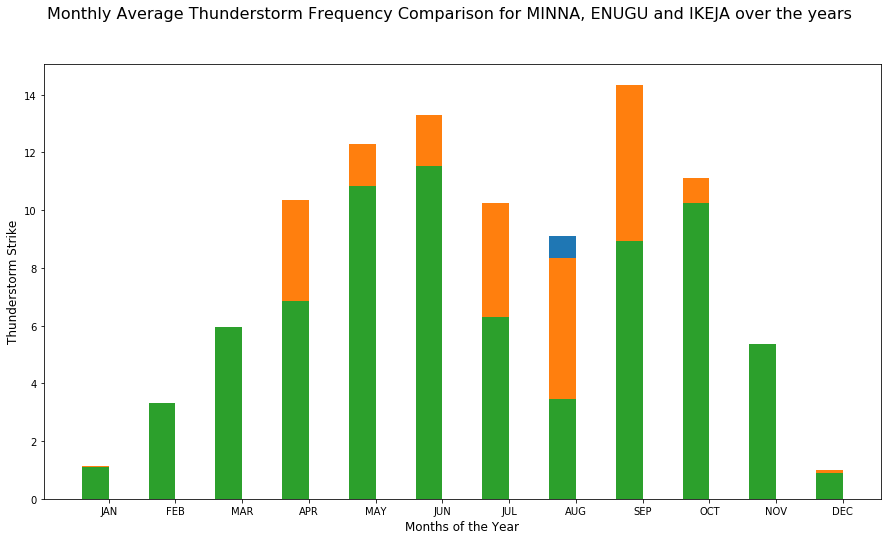

In [21]:
barchart_comparison('MINNA', 'ENUGU', 'IKEJA')